In [210]:
import numpy as np
from numpy import kron
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from numpy.linalg import eig 
import json

In [10]:
def trunc3(i):
    return m.trunc(i*1000)/1000

In [168]:
# Defining matrices to use
x = np.array([[0,1],
                   [1,0]])
z = np.array([[1,0],
                   [0,-1]])
y = np.array([[0, 1.j],
                   [-1.j, 0]], dtype=np.complex_)
I = np.array([[1,0],
              [0,1]])

# Getting A(s) and B(s) values in the program
test = pd.read_excel("09-1263A-B_Advantage_system4_1_annealing_schedule.xlsx", 1,
                     usecols = "A:C", 
                     names = ["s","A","B"],
                     )
A = test[["s","A"]].to_numpy()
A = {trunc3(row[0]): row[1] for row in A}
B = test[["s","B"]].to_numpy()
B = {trunc3(row[0]): row[1] for row in B}

In [169]:
print(type(A))

<class 'dict'>


In [170]:
H_test = np.kron(z, z)
eigvals, eigvecs = np.linalg.eigh(H_test)
print(eigvals)
print(eigvecs)

[-1. -1.  1.  1.]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [197]:
J_Class_14_51_39 = np.array([-0.19439, 0.22309, 0.31259, -0.41736, -0.26739])
J_Class_03_45_27 = np.array([0.42959, -0.74493, 0.71063, 0.98596, 0.03767])
J_Quant_15_15_08 = np.array([0.36519, 0.54988, -0.10742, 0.94503, -0.39528])

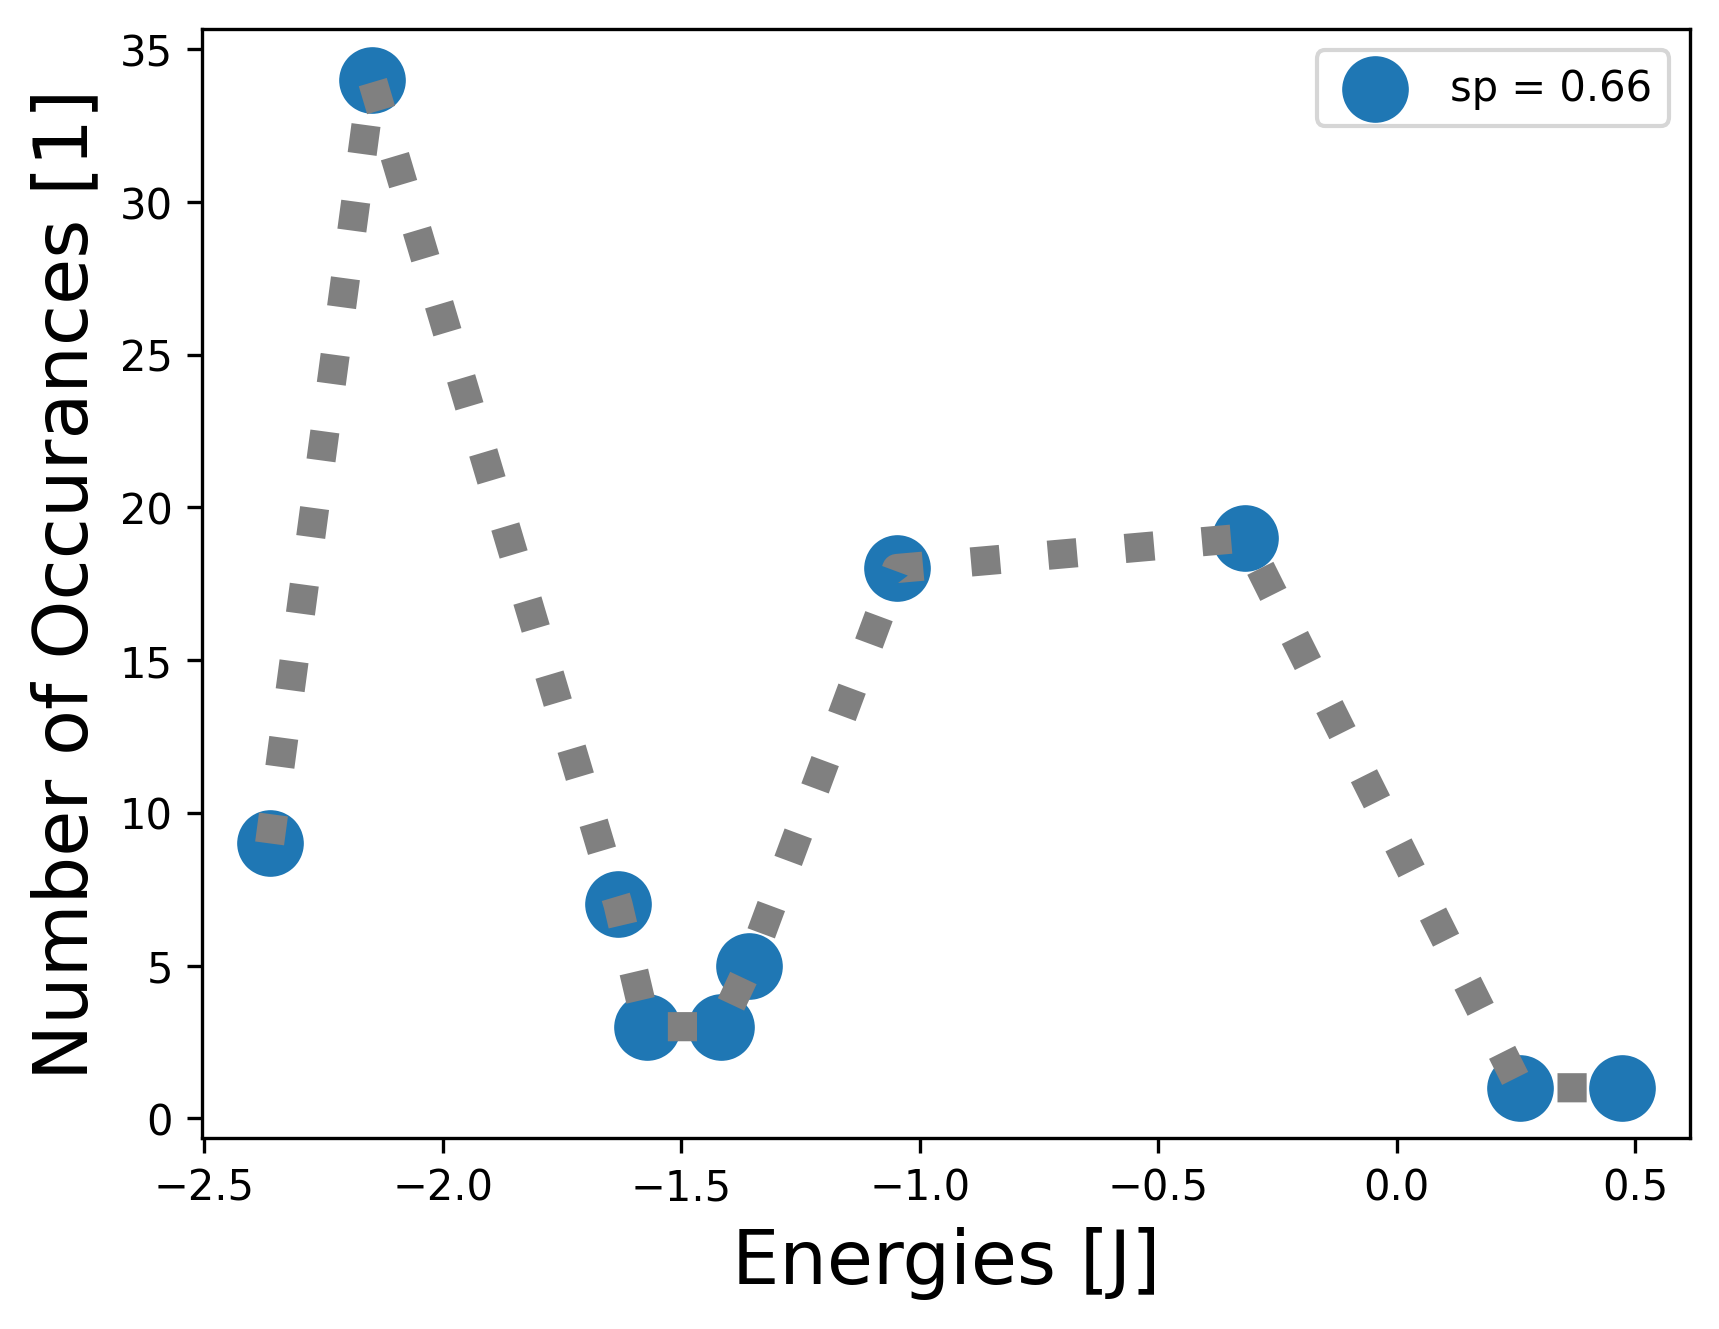

In [223]:
sampleSet = [[-2.36280748, -2.14795966, -1.63242771, -1.57224334, -1.41757989, -1.35739553, -1.04819196, -0.31781218, 0.25790413, 0.47275195],[9, 34, 7, 3, 3, 5, 18, 19, 1, 1]]
fig, ax = plt.subplots(dpi=300)
plt.scatter(sampleSet[0], sampleSet[1], label = f"sp = 0.66", marker='o', lw=10)
plt.plot(sampleSet[0], sampleSet[1], linestyle=':', color='grey', lw=7)
plt.xlabel("Energies [J]", size = 18)
plt.ylabel("Number of Occurances [1]", size = 18)
plt.legend()
plt.show()

In [234]:
s = 0.66
J = J_Quant_15_15_08
H_d = kron(kron(kron(kron(kron(x,I), I), I), I),I) + \
      kron(kron(kron(kron(kron(I,x), I), I), I),I) + \
      kron(kron(kron(kron(kron(I,I), x), I), I),I) + \
      kron(kron(kron(kron(kron(I,I), I), x), I),I) + \
      kron(kron(kron(kron(kron(I,I), I), I), x),I) + \
      kron(kron(kron(kron(kron(I,I), I), I), I),x)
H_d = H_d * -1* A[s]*0.5

H_p = J[0]*kron(kron(kron(kron(kron(z,z), I), I), I),I) + \
      J[1]*kron(kron(kron(kron(kron(I,z), z), I), I),I) + \
      J[2]*kron(kron(kron(kron(kron(I,I), z), z), I),I) + \
      J[3]*kron(kron(kron(kron(kron(I,I), I), z), z),I) + \
      J[4]*kron(kron(kron(kron(kron(I,I), I), I), z),z)
H_p = H_p * B[s] * 0.5
H = H_d+H_p
# H = H_p
eigvals, eigvecs = np.linalg.eig(H)
eigvals = eigvals*2/B[s]

In [235]:
print(eigvecs)

[[ 1.04109533e-06 -9.21943181e-17 -1.01166468e-09 ... -1.26484312e-06
  -4.43871335e-09  6.65007016e-09]
 [-1.47496465e-08  1.92927737e-07 -1.61436142e-07 ... -4.27734455e-10
  -7.60720689e-07 -7.51562481e-07]
 [-5.27774706e-04  6.54176288e-07 -5.47392486e-07 ...  1.61521963e-09
  -5.45115505e-06  5.53652726e-06]
 ...
 [-1.89392672e-08 -5.47389879e-07 -6.54178469e-07 ...  1.74347044e-09
   6.26103923e-06  6.18561143e-06]
 [-2.65868895e-08 -1.61434470e-07 -1.92929136e-07 ... -8.16618764e-10
   6.62318312e-07 -6.72698345e-07]
 [ 7.47195831e-11  1.78409111e-10 -9.95808960e-10 ... -1.43041177e-06
   5.39527567e-09  7.19506505e-09]]


In [237]:
# np.savetxt("C:/Users/cicer/Documents/ThesisWork/Poster Stuff/Hamiltonian_15'15'08.csv",eigvecs, fmt='%.5e', delimiter=',')
np.savetxt("C:/Users/cicer/Documents/ThesisWork/Poster Stuff/eigvectors_15'15'08.csv",eigvecs, fmt='%.5e', delimiter=',')
np.savetxt("C:/Users/cicer/Documents/ThesisWork/Poster Stuff/eigvalues_15'15'08.csv",eigvals, fmt='%.5e', delimiter=',')

In [199]:
print(sorted(diagH(s=0.66,J=J_Quant_15_15_08)[0]))

[-2.3628, -2.3628, -2.1479600000000003, -2.1479600000000003, -1.6324200000000002, -1.6324200000000002, -1.57224, -1.57224, -1.41758, -1.41758, -1.3574000000000002, -1.3574000000000002, -1.26304, -1.26304, -1.0482, -1.0482, -0.84186, -0.84186, -0.6270199999999999, -0.6270199999999999, -0.5326599999999999, -0.5326599999999999, -0.4727400000000001, -0.4727400000000001, -0.47247999999999996, -0.47247999999999996, -0.31781999999999994, -0.31781999999999994, -0.2579000000000001, -0.2579000000000001, -0.2576399999999999, -0.2576399999999999, 0.2576399999999999, 0.2576399999999999, 0.2579000000000001, 0.2579000000000001, 0.31781999999999994, 0.31781999999999994, 0.47247999999999996, 0.47247999999999996, 0.4727400000000001, 0.4727400000000001, 0.5326599999999999, 0.5326599999999999, 0.6270199999999999, 0.6270199999999999, 0.84186, 0.84186, 1.0482, 1.0482, 1.26304, 1.26304, 1.3574000000000002, 1.3574000000000002, 1.41758, 1.41758, 1.57224, 1.57224, 1.6324200000000002, 1.6324200000000002, 2.14796

In [22]:
sampleSet= [[[-1,  +1,  +1,  +1,   +1,   -1], -2.90774, 60],
[[-1,  -1,  -1,  -1,   -1,   +1], -2.833443,39],
[[+1,  +1,  +1,  +1,   -1,   -1], -2.049604,1]]

In [ ]:
classical = [[-1.414815,-1.026037,-0.968629,-0.579851,-0.433858], [91,5,2,1,1]]
fig, ax = plt.subplots(dpi = 300)
# plt.scatter(classical[0], classical[1], marker='o', facecolors='none', edgecolors='b',label = "Classical")
plt.plot([-1.414815, -1.414815],[0,91], linestyle = ":",linewidth = '9', label = 'Algorithm', color = 'grey')
plt.scatter(classical[0], classical[1], marker='o',label = "Samples", s = 200)
plt.xlabel("Energy of state [J]", size = 18)
plt.ylabel("Number of Occurances", size = 18)
# plt.plot(classical[0], classical[1], linestyle=':', color='b', lw=4)
plt.legend()
plt.show()

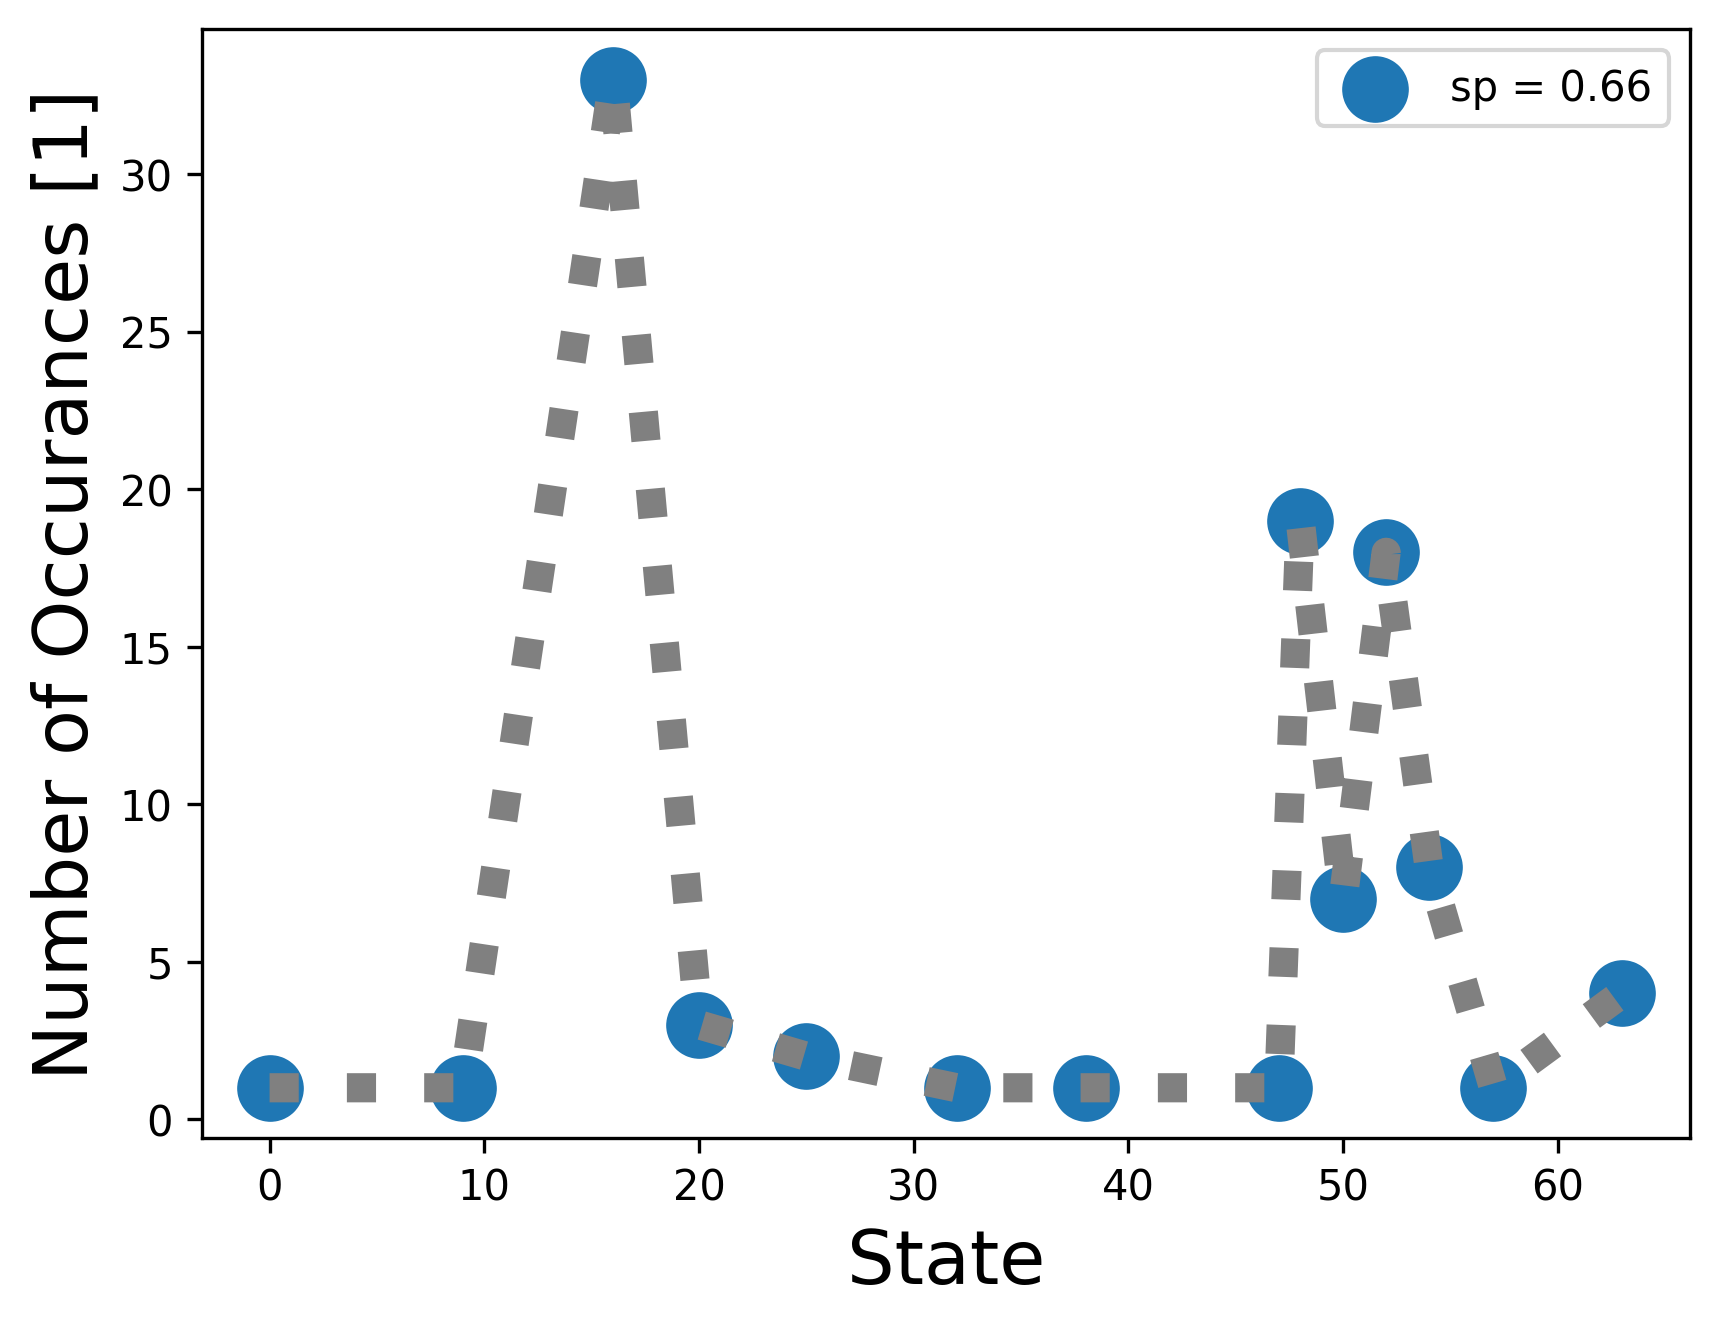

In [241]:
stateOccurances = [[0, 9, 16, 20, 25, 32, 38, 47, 48, 50, 52, 54, 57, 63],[1, 1, 33, 3, 2, 1, 1, 1, 19, 7, 18, 8, 1, 4]]
fig, ax = plt.subplots(dpi=300)
plt.scatter(stateOccurances[0], stateOccurances[1], label = f"sp = 0.66", marker='o', lw=10)
plt.plot(stateOccurances[0], stateOccurances[1], linestyle=':', color='grey', lw=7)
plt.xlabel("State", size = 18)
plt.ylabel("Number of Occurances [1]", size = 18)
plt.legend()
plt.show()

In [251]:
stateNo = [0, 9, 16, 20, 25, 32, 38, 47, 48, 50, 52, 54, 57, 63]
occurrences = [1, 1, 33, 3, 2, 1, 1, 1, 19, 7, 18, 8, 1, 4]
sumOccurs = np.sum(occurrences)
normedOccurs = occurrences/sumOccurs

In [252]:
stateNoFull = [19, 44, 51, 18, 12, 45, 27, 36, 3, 23, 60, 40, 17, 46, 35, 50, 28, 13, 11, 52, 59, 26, 4, 16, 21, 37, 47, 42, 2, 55, 22, 61, 8, 49, 41, 14, 31, 32, 25, 7, 38, 56, 1, 62, 43, 20, 34, 29, 58, 10, 5, 48, 54, 53, 39, 33, 15, 9, 63, 57, 24, 30, 6, 0]
percs = [0.588, 0.412, 1.36e-06, 1.16e-06, 9.53e-07, 8.13e-07, 4.2e-07, 2.94e-07, 2.17e-07, 1.64e-07, 1.52e-07, 1.15e-07, 1.01e-07, 7.07e-08, 2.72e-12, 2.69e-12, 1.9e-12, 1.88e-12, 1.71e-12, 1.2e-12, 9.72e-13, 8.29e-13, 6.8e-13, 6.73e-13, 6.37e-13, 5.81e-13, 4.71e-13, 4.46e-13, 4.28e-13, 3.79e-13, 3.24e-13, 3e-13, 2.65e-13, 2.34e-13, 2.27e-13, 1.64e-13, 1.53e-13, 1.07e-13, 7.21e-14, 6.04e-14, 5.05e-14, 4.23e-14, 3.72e-14, 2.61e-14, 1.19e-16, 3.31e-17, 2.56e-18, 1.17e-18, 9.6e-19, 6.77e-19, 4.55e-19, 3.11e-19, 1.69e-19, 1.05e-19, 8.41e-20, 4.98e-20, 4.8e-20, 3.29e-20, 3.18e-20, 1.43e-20, 1.22e-21, 4.82e-22, 1.17e-23, 8.5e-33]

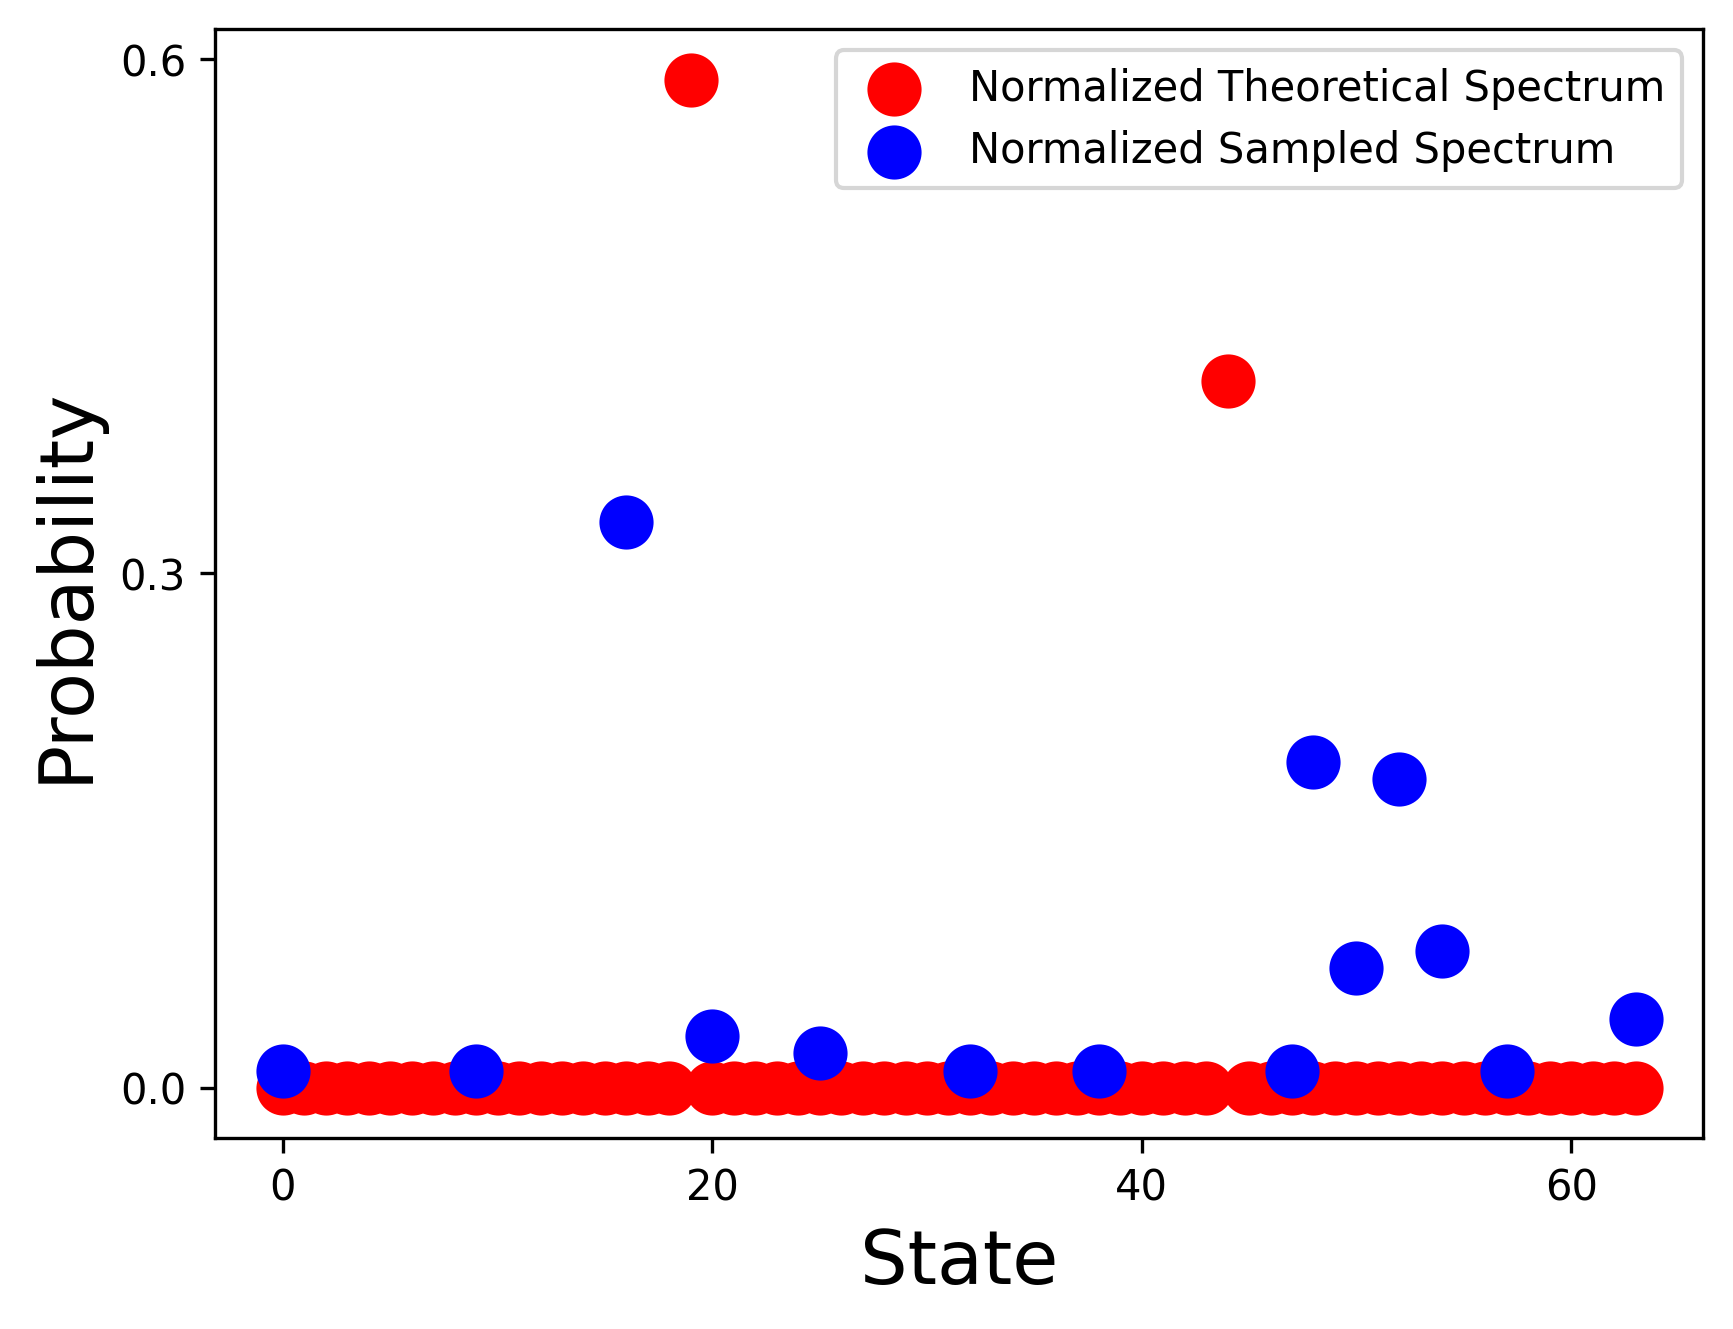

In [267]:
# Plot the points
plt.figure(dpi=300)
plt.scatter(stateNoFull, percs, color='red', label = 'Normalized Theoretical Spectrum', lw=7)
plt.scatter(stateNo, normedOccurs, color = 'blue', label='Normalized Sampled Spectrum', lw=7)
plt.yticks([0,0.3,0.6])
plt.xticks([0,20,40,60])
plt.xlabel('State', fontsize=18)
plt.ylabel('Probability', fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [1]:
print(bin(19))

0b10011
